In [14]:
import pandas as pd


datasets = {
    "Benin": pd.read_csv("../data/benin-malanville.csv"),
    "Sierra Leone": pd.read_csv("../data/sierraleone-bumbuna.csv"),
    "Togo": pd.read_csv("../data/togo-dapaong_qc.csv"),
}

for name, df in datasets.items():
    print(f"Dataset: {name}")
    print(df.info())
    print(df.describe())


Dataset: Benin
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB         

In [15]:
for name, df in datasets.items():
    print(f"Summary for {name}:")
    print(df.describe())


Summary for Benin:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0.

In [16]:
for name, df in datasets.items():
    print(f"Missing Values in {name}:")
    print(df.isnull().sum())


Missing Values in Benin:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64
Missing Values in Sierra Leone:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64
Missi

In [17]:
for name, df in datasets.items():
    invalid_ghi = df[df["GHI"] < 0]
    print(f"Invalid GHI values in {name}:\n", invalid_ghi)


Invalid GHI values in Benin:
                Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0       2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1       2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2       2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3       2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4       2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   
...                  ...  ...  ...  ...   ...   ...   ...   ...  ...     ...   
525595  2022-08-08 23:56 -5.5 -0.1 -5.9   0.0   0.0  23.1  98.3  0.3     1.1   
525596  2022-08-08 23:57 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.2     0.7   
525597  2022-08-08 23:58 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.4  0.6     1.1   
525598  2022-08-08 23:59 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.9     1.3   
525599  2022-08-09 00:00 -5.5 -0.1 -5.7   0.0   0.0  23.1  98.3  1.2     1.6   

        W

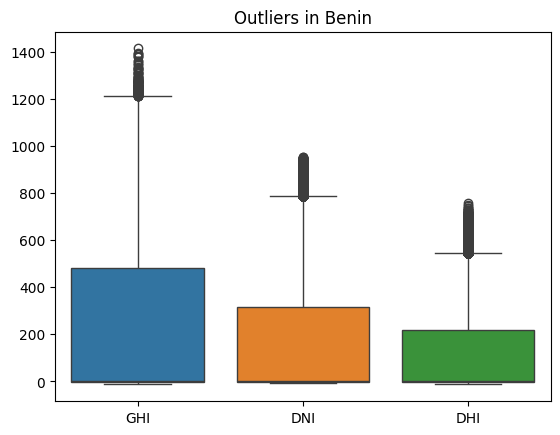

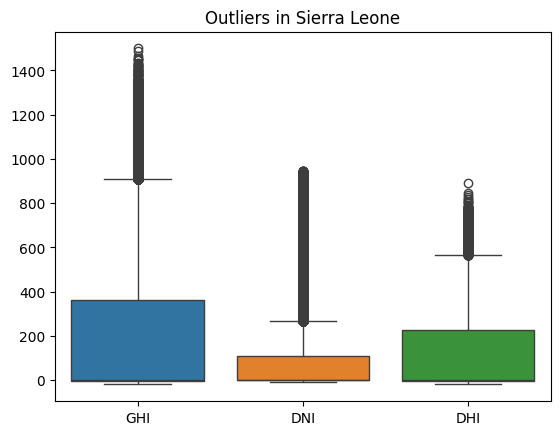

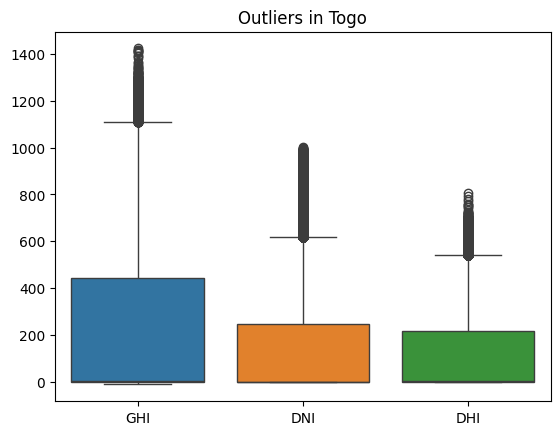

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

for name, df in datasets.items():
    sns.boxplot(data=df[["GHI", "DNI", "DHI"]])
    plt.title(f"Outliers in {name}")
    plt.show()


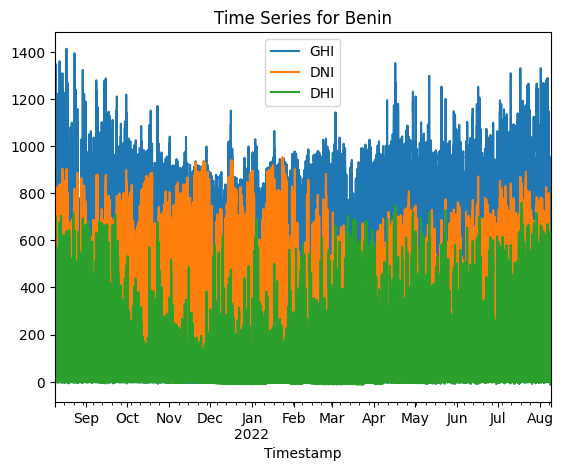

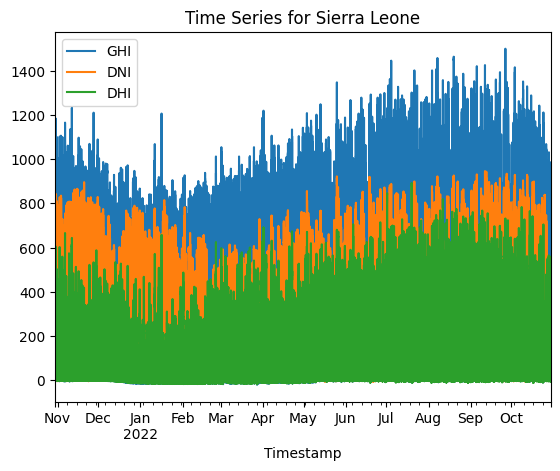

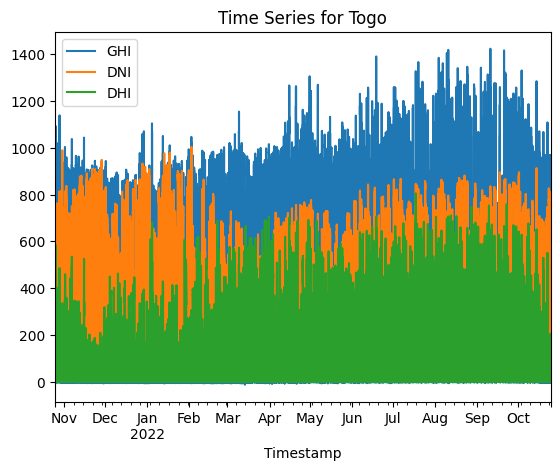

In [19]:
for name, df in datasets.items():
    df["Timestamp"] = pd.to_datetime(df["Timestamp"])
    df.set_index("Timestamp", inplace=True)
    df[["GHI", "DNI", "DHI"]].plot(title=f"Time Series for {name}")
    plt.show()


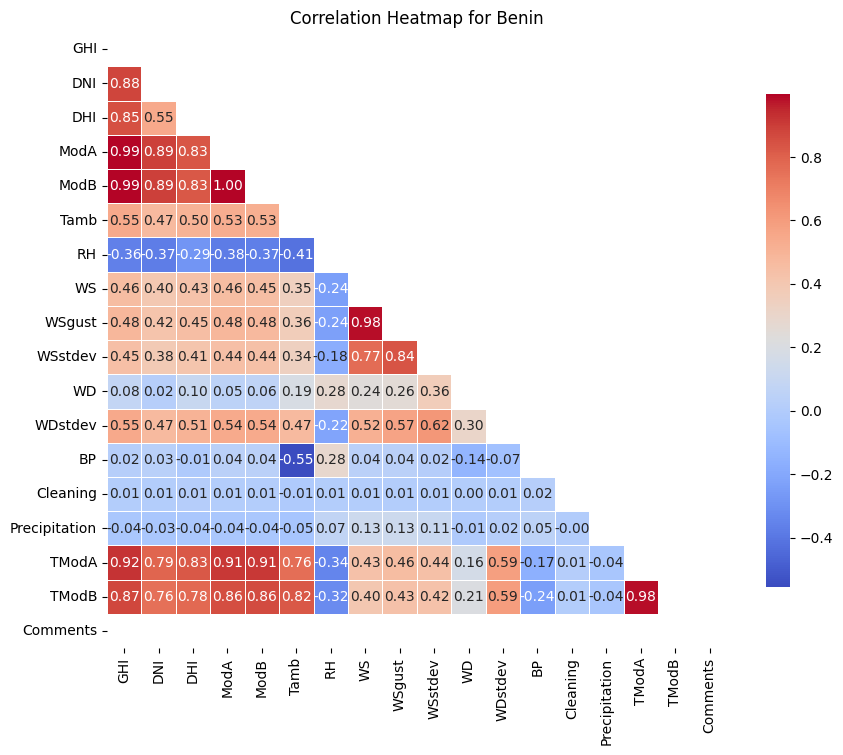

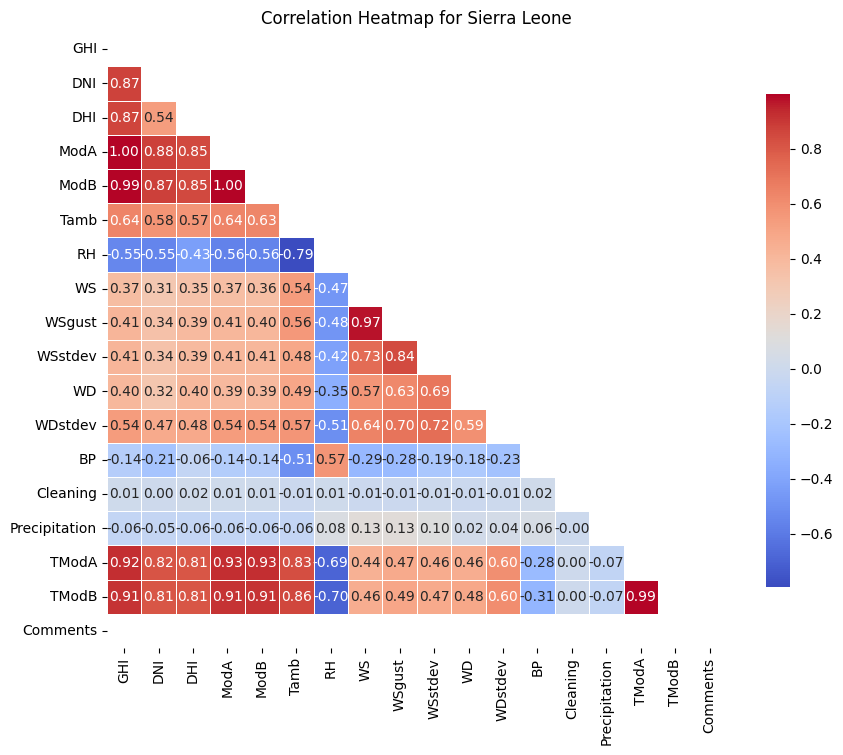

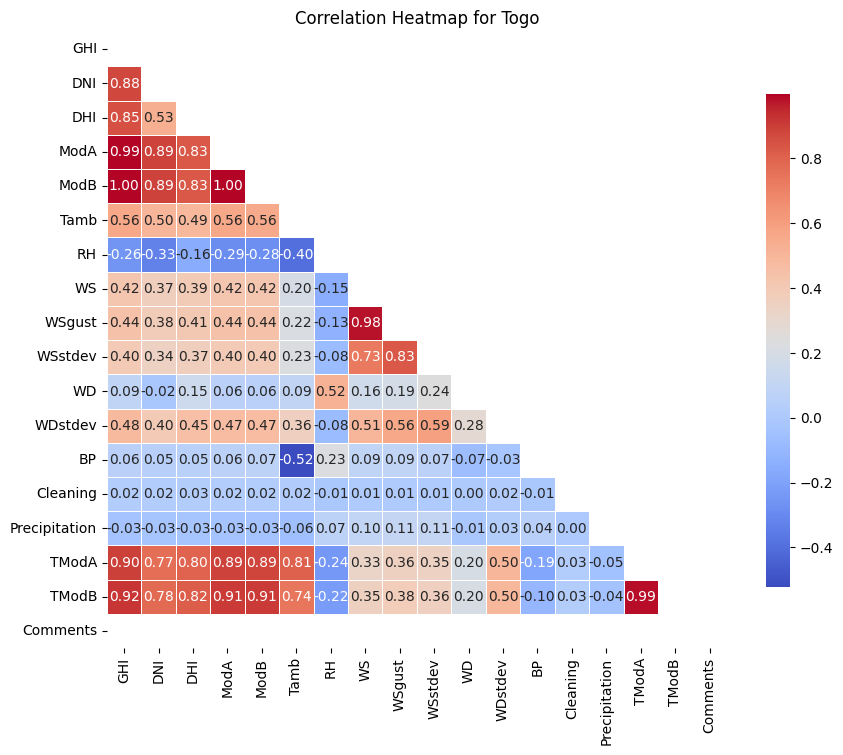

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

for name, df in datasets.items():
    correlation = df.corr()
    
    mask = np.triu(np.ones_like(correlation, dtype=bool))
    
    plt.figure(figsize=(10, 8))  
    sns.heatmap(correlation, 
                annot=True, 
                cmap="coolwarm", 
                fmt=".2f",  
                annot_kws={"size": 10},  
                mask=mask,  
                linewidths=0.5,  
                cbar_kws={"shrink": 0.8})  
    
    plt.title(f"Correlation Heatmap for {name}")
    plt.show()


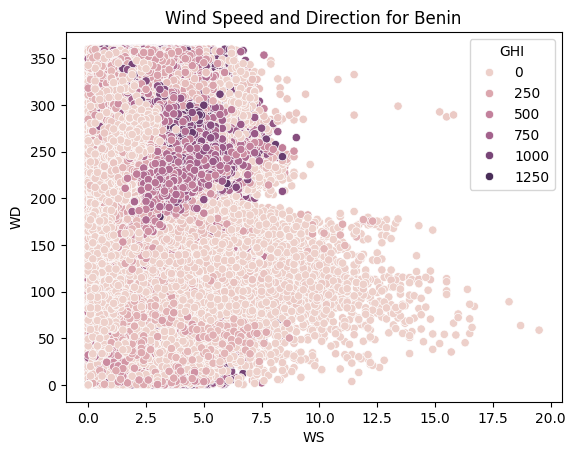

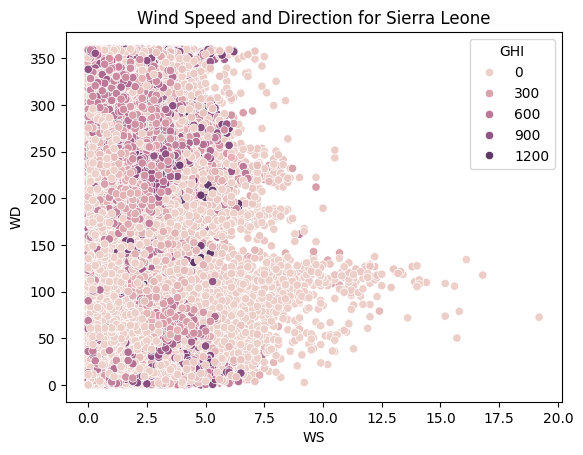

/home/gabie/MoonLight-Analytics-Project-1/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


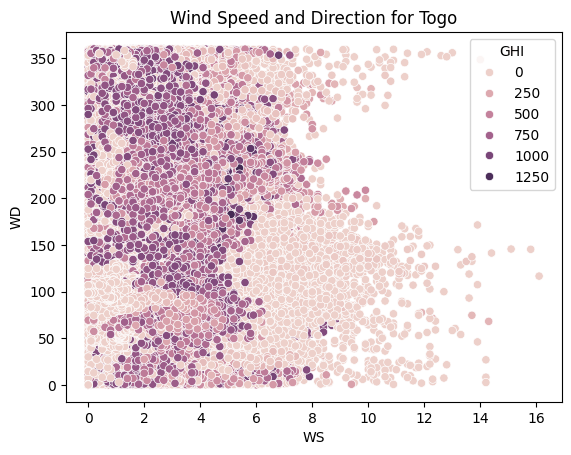

In [22]:
for name, df in datasets.items():
    sns.scatterplot(x=df["WS"], y=df["WD"], hue=df["GHI"])
    plt.title(f"Wind Speed and Direction for {name}")
    plt.show()


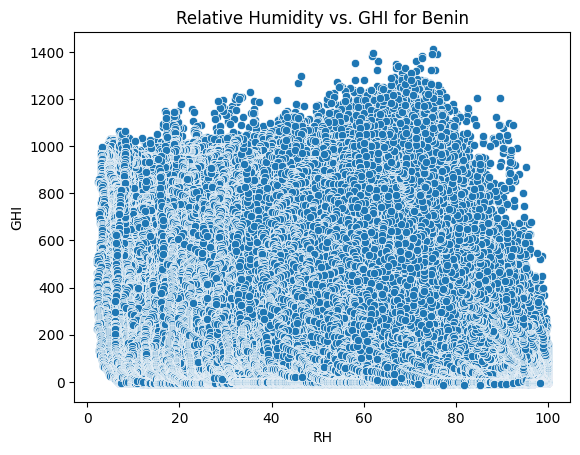

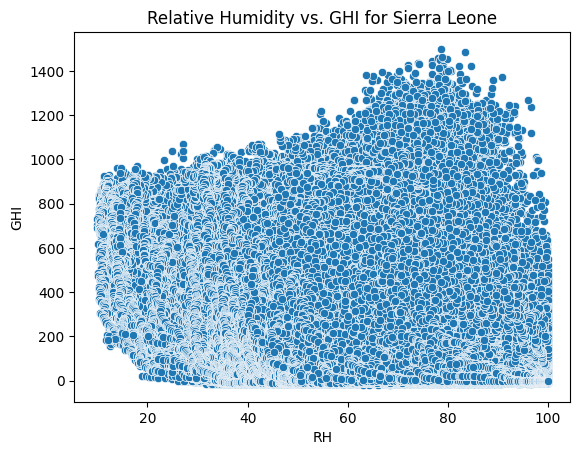

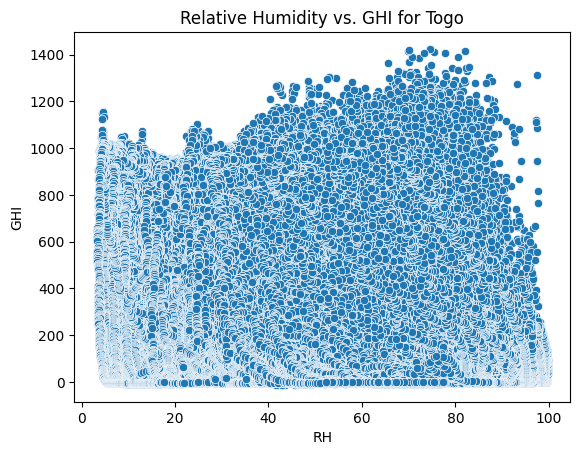

In [ ]:
#Investigate RH's impact:
for name, df in datasets.items():
    sns.scatterplot(x=df["RH"], y=df["GHI"])
    plt.title(f"Relative Humidity vs. GHI for {name}")
    plt.show()


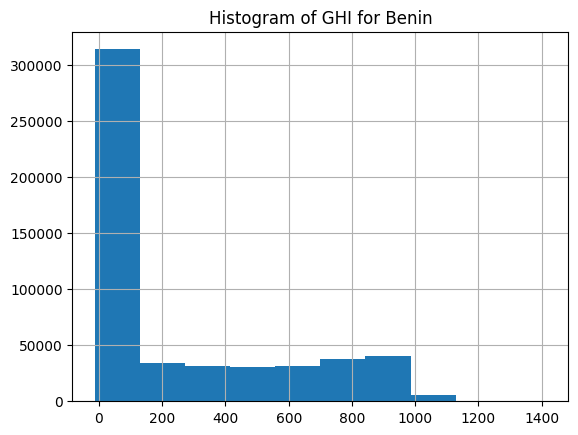

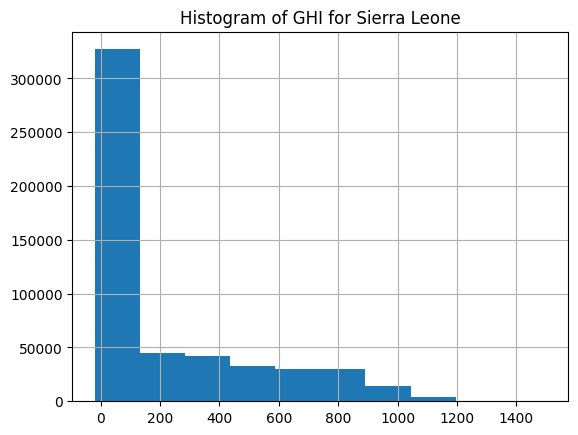

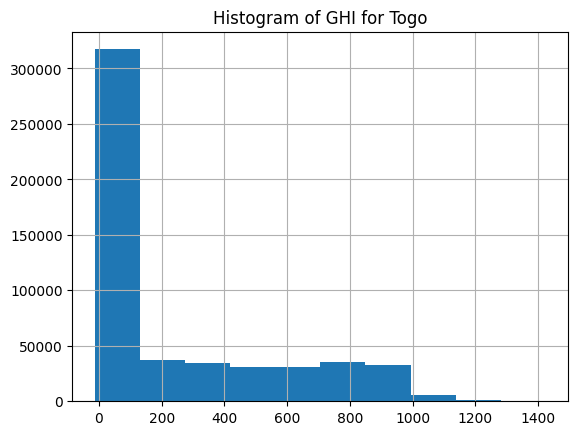

In [24]:
#Plot histograms for all datasets:
for name, df in datasets.items():
    df["GHI"].hist()
    plt.title(f"Histogram of GHI for {name}")
    plt.show()


In [26]:
#Z-Score Analysis
from scipy.stats import zscore

for name, df in datasets.items():
    df["z_ghi"] = zscore(df["GHI"].dropna())
    anomalies = df[df["z_ghi"] > 3]
    print(f"Anomalies in {name}:\n", anomalies)


Anomalies in Benin:
                         GHI    DNI    DHI    ModA    ModB  Tamb    RH   WS  \
Timestamp                                                                    
2021-08-09 11:12:00  1274.0  698.8  615.2  1210.3  1210.3  30.1  69.6  3.4   
2021-08-09 11:15:00  1349.0  771.8  618.0  1281.5  1281.5  30.9  67.1  4.0   
2021-08-09 11:17:00  1334.0  751.9  620.0  1267.3  1267.3  31.1  67.0  2.7   
2021-08-09 14:10:00  1253.0  714.8  552.5  1156.0  1155.0  31.0  64.2  3.3   
2021-08-09 14:11:00  1324.0  813.0  532.3  1218.0  1217.0  31.0  62.9  2.2   
...                     ...    ...    ...     ...     ...   ...   ...  ...   
2022-08-03 13:38:00  1268.0  652.5  612.1  1163.0  1150.0  30.1  70.7  2.7   
2022-08-05 13:40:00  1280.0  778.5  497.2  1168.0  1161.0  29.0  70.3  3.8   
2022-08-05 14:17:00  1244.0  745.2  530.4  1126.0  1118.0  30.8  64.3  3.0   
2022-08-06 13:15:00  1262.0  772.4  475.8  1166.0  1153.0  31.1  66.0  3.4   
2022-08-06 13:16:00  1289.0  758.1  519.2  

In [30]:
#Define a cleaning function:
def clean_data(df):
    df.fillna(method="ffill", inplace=True)
    df = df[df["GHI"] >= 0]  # Remove invalid values
    return df

cleaned_data = {name: clean_data(df) for name, df in datasets.items()}



/tmp/ipykernel_29242/2241403511.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)


In [28]:
# save cleaned data set
for name, df in cleaned_data.items():
    df.to_csv(f"results/cleaned_{name.lower().replace(' ', '_')}.csv", index=False)


OSError: Cannot save file into a non-existent directory: 'results'